In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
corr_matrix=df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


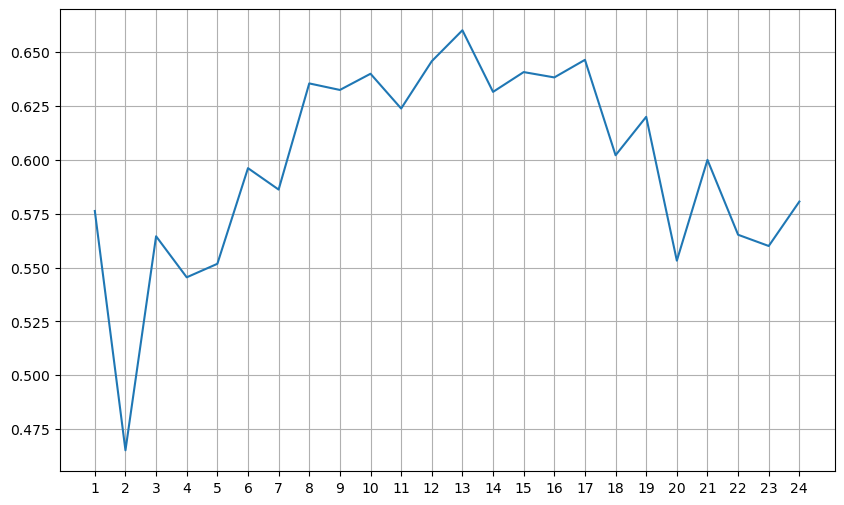

In [7]:
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

X=df.drop('Outcome',axis=1).values
Y=df['Outcome']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, Y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(Y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [18]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,Y_train)

y_pred=knn.predict(X_test)

from sklearn.metrics import jaccard_score
jaccard_score(Y_test,y_pred)

0.4927536231884058

In [19]:
pd.DataFrame({'asl':Y_test,'bashorat':y_pred})

,asl,bashorat
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[85, 14],
       [21, 34]], dtype=int64)

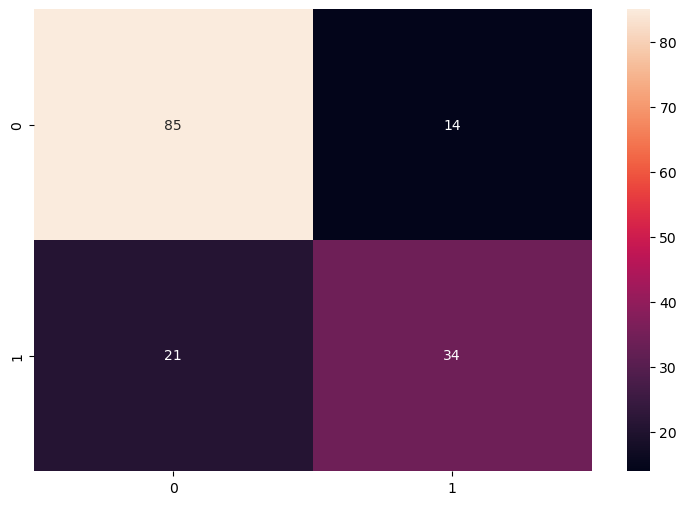

In [21]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':np.arange(1,25)}
knn_gscv=GridSearchCV(knn,param_grid,cv=5)
knn_gscv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=15),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [13]:
knn_gscv.best_score_

0.7578558696205755

In [15]:
knn1=KNeighborsClassifier(n_neighbors=14)
knn1.fit(X_train,Y_train)

y_pred1=knn.predict(X_test)

from sklearn.metrics import jaccard_score
jaccard_score(Y_test,y_pred1)

0.4714285714285714

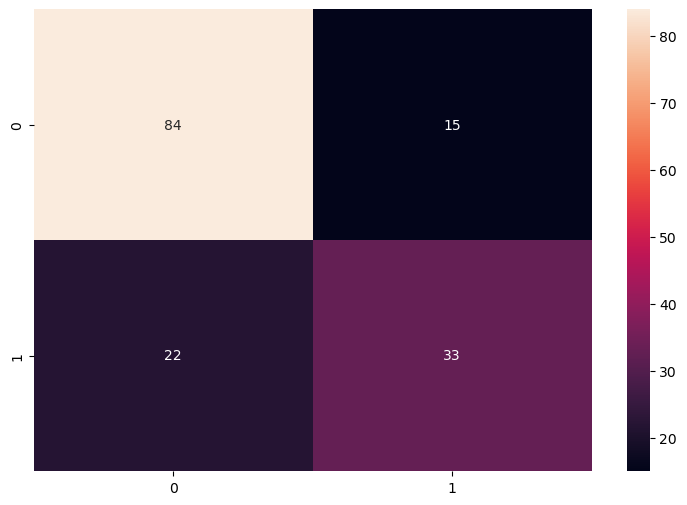

In [16]:
plt.figure(figsize=(9,6))
sns.heatmap(confusion_matrix(Y_test,y_pred1),annot=True)
plt.show()